In [16]:
import numpy as np

def alpha_stable_sample(n, alpha, beta=1, gamma=1, delta=0):
    # Initialize samples array with zeros
    sample = np.zeros(n)
    
    # Constants that do not depend on the sample index and thus can be computed once
    if alpha != 1:
        S_alpha_beta = (1 + beta ** 2 * np.tan(np.pi * alpha / 2) ** 2) ** (1 / (2 * alpha))
        B_alpha_beta = (1 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))

    for i in range(n):
        U = np.random.uniform(-np.pi/2, np.pi/2)
        W = -np.log(1 - np.random.uniform(0,1))
        
        # Handle the case alpha = 1 separately
        if alpha != 1:
            part1 = np.sin(alpha * (U + B_alpha_beta)) / (np.cos(U) ** (1 / alpha))
            part2 = (np.cos(U - alpha * (U + B_alpha_beta)) / W) ** ((1 - alpha) / alpha)
            sample[i] = S_alpha_beta * part1 * part2
        else:
            sample[i] = (2 / np.pi) * ((np.pi / 2 + beta * U) * np.tan(U) - beta * np.log((np.pi / 2 * W * np.cos(U))/(np.pi+beta*U)))

    # Apply scaling and location shifting
    sample = gamma * sample + delta
    return sample


In [23]:
def generate_multivariate_alpha_stable(n,d, k, alpha, beta=1, gamma=1, delta=0):
    """
    
    
    Args:
        n (int): Total Number of Samples to Generate
        d (int): Dimensionality of Each Sample
        k (int): the number of independent alpha-stable random variables Z_j
        

    """
    sample = np.zeros((n,d))

    # Initialize the resulting vector
    Y = np.zeros(d)

    
    # Generate random weights and direction vectors
    
    weights = np.random.dirichlet(np.ones(k), size=1)  ## Generate random weights from a Dirichlet distribution Weights sum to 1
    directions = np.random.randn(k, d)  # Random direction vectors in d dimensions
    for i in range(n):
        # Generate each Z_j 
        Z = alpha_stable_sample(k,alpha)
        #apply the transformation
        for j in range(k):        
            # If alpha is not 1, use the transformation for alpha not equal to 1
            if alpha != 1:
                  contribution = (weights[0][j] ** (1/alpha)) * Z[j] * directions[j]
            else:
                 # If alpha is 1, include the logarithmic adjustment in the transformation
                  contribution = weights[0][j] * (Z[j] + (2 / np.pi) * np.log(weights[0][j])) * directions[j]
        
           # Add the contribution to the final vector Y
            Y += contribution
       
           # Adjust Y by adding a location vector mu0 (set to zero here for simplicity)
        mu0 = np.zeros(d)
        Y += mu0
        sample[i]=Y
    
    return sample

In [33]:
# Example of generating one sample
sample_d = generate_multivariate_alpha_stable(n=10000,d=3,k=100,alpha=1.7, beta=1, gamma=1, delta=0)

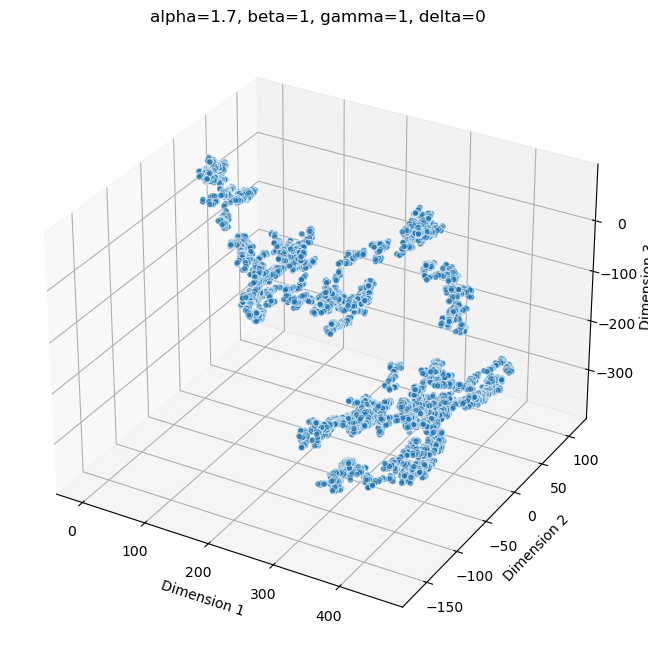

In [34]:
x = sample_d[:, 0]  # x-coordinates
y = sample_d[:, 1]  # y-coordinates
z = sample_d[:, 2]  # z-coordinates from the third column

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))  # Create a figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Plot data
ax.scatter(x, y, z, alpha=0.6, edgecolor='w', linewidth=0.5)  # Scatter plot

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('alpha=1.7, beta=1, gamma=1, delta=0')

plt.show()  # Display the plot